# Track simulation tool

This is a track simulation tool developed by **UNNC racing team**. 

## Aim of the work

The track simulation tool was mainley developed to analyze the effect of the *Aerodynamic kit* on the competition tracks. it was then extended, and presented here, to take into consideration its effect on the car *bais ratio* of the brake system, and on the *Final Reduction Ratio* of the drive line knwoing all the other parameters of the car (e.g., Car mass, engine torque vs rpm curve, etc.) 

## Systems modeling

The car is modeled as a point mass duing acceleration in straigh roads and corners. However, during deceleration, the car is modeled as a 4-DOF model. This decesion was based on that point mass modeling during deceleration has led to simulation inaccuracey.


## Solution and outputs

The code will save the solutions in an excel sheet and the solutions to be saved without intervention in the code are:
1. lap time
2. velocity vs distance curve
3. lateral acceleration vs distance curve
4. Ideal shifting RPM on each gear for minumum lap time

In [31]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [32]:
file_loc = "Car specs.xlsx" #add excel sheet file path here


import pandas as pd
df = pd.read_excel(file_loc, index_col=None, parse_cols = "B,E,H,J,K,N,P,Q,R", skiprows = [i for i in range(0,7)])


** Now let's show the inputs here**


In [33]:
df[['road type (s for straight road, c for corner)', 'road length (m)', 'road radius (m) (if corner)']]

,"road type (s for straight road, c for corner)",road length (m),road radius (m) (if corner)
0,s,7.000,NaN
1,c,10.000,7.000
2,s,15.000,NaN
3,c,1.000,5.000
4,c,25.000,27.647
5,s,35.000,NaN
6,c,8.266,3.900
7,s,12.000,NaN
8,c,7.605,5.000
9,s,80.000,NaN


*Track description*

In [34]:
df = pd.read_excel(file_loc, index_col=None, parse_cols = "J,K", skiprows = [i for i in range(0,7)])
df.dropna(axis=0, how='all')

,Engine torque (N.m),Engine rpm
0,0.00,0.0
1,15.56,1000.0
2,21.30,2000.0
3,24.60,3000.0
4,30.77,4000.0
5,44.50,5000.0
6,49.00,6000.0
7,52.45,7000.0
8,56.97,8000.0
9,51.66,9000.0


*Engine Torque vs RPM*

In [35]:
df = pd.read_excel(file_loc, index_col=None, parse_cols = "M,N", skiprows = [i for i in range(0,7)])
df.dropna(axis=0, how='all')

,Reduction ratios,R.value
0,Primary reduction,2.111
1,Final reduction ratio,2.700
2,1st reduction,2.666
3,2nd reduction,1.937
4,3rd reduction,1.611
5,4th reduction,1.409
6,5th reduction,1.260
7,6th reduction,1.166


*Engine reduction ratios*

In [36]:
df = pd.read_excel(file_loc, index_col=None, parse_cols = "A,B", skiprows = [i for i in range(0,7)])
df.dropna(axis=0, how='all')

,Variable,C.value
0,car mass - m (kg),280
1,C.G height (m),0.324
2,Area refrence of the car (m^2),1.1476
3,coefficint of drag of the car (Cd),0.666807
4,coefficint of rolling resistance of the road (Cr),0.014
5,coeffificint of friction of tires,1.2
6,coeffificint of friction of tires during slipp...,0.8
7,coeffificint of friction of tires during skidd...,0.8
8,wheel radius (m),0.254
9,car wheel base (m),1.635


*car different parametes*

In [37]:
df = pd.read_excel(file_loc, index_col=None, parse_cols = "D,E", skiprows = [i for i in range(0,7)])
df.dropna(axis=0, how='all')

,Variable,A.value
0,A rear wing (m^2),0.32
1,Cl rear wing,5.7
2,Cd rear wing,1.1
3,A front wing (m^2),0.08
4,Cl front wing,5.7
5,Cd front wing,1.1
6,Active wings?,n
7,Cd of active wings,0.4
8,Cl of active wings,3.7
9,mass of the kit (kg),5


*aerodynamic kit inputs*

In [38]:
df = pd.read_excel(file_loc, index_col=None, parse_cols = "G,H", skiprows = [i for i in range(0,7)])
df.dropna(axis=0, how='all')

,Variable,B.value
0,Human Force (N),250.0000
1,brake constant,12.3263
2,bias ratio front,0.6500


*Brakes inputs*

### Start the simulation

In [39]:
df = pd.read_excel(file_loc, index_col=None, parse_cols = "B,E,H,J,K,N,P,Q,R", skiprows = [i for i in range(0,7)])

m  = df['C.value'][0]    #mass kg
A  = df['C.value'][2]       #frontal area m^2
Cd = df['C.value'][3]        #coefficint of drag of the car

Cr           = df['C.value'][4]     #coefficint of rolling resistance 
meu          = df['C.value'][5]
meu_slip     = df['C.value'][6]
meu_skid     = df['C.value'][7]
wheel_raduis = df['C.value'][8]

#Brake specs
L  = df['C.value'][9] 
L1 = df['C.value'][11] 
L2 = df['C.value'][10] 
h  = df['C.value'][1] 

bias_f            = df['B.value'][2]
bias_r            = 1-bias_f
human_force       = df['B.value'][0]
brake_constant    = df['B.value'][1]
total_brake_force = human_force*brake_constant
Wfs = m * 9.81 * L2/L
Wrs = m * 9.81 * L1/L

# Engine specs
# Gearing ratios
PR  = df['R.value'][0]   #primary reduction
Ri  = df['R.value'].dropna()[2:].tolist()
FRR = df['R.value'][1]  #Final Reduction ratio

#torque vs rpm

rpm           = df['Engine rpm'].dropna().tolist()
Engine_torque = df['Engine torque (N.m)'].dropna().tolist()

""" aerokit data """

A_aerofoil      = df['A.value'][0] #area of aerofoil, rear wing
A_aerofoil_f    = df['A.value'][3] #area of aerofoil, front wing
Cl_aerofoil_f   = df['A.value'][4]
Cd_aerofoil_f   = df['A.value'][5]
Cl_aerofoil_f_A = df['A.value'][11]
Cd_aerofoil_f_A = df['A.value'][10]
Cd_aerofoil_s_S = df['A.value'][2]
Cl_aerofoil_s_S = df['A.value'][1]
Cd_aerofoil_c_S = df['A.value'][2]
Cl_aerofoil_c_S = df['A.value'][1]
Cd_aerofoil_s_A = df['A.value'][7]
Cl_aerofoil_s_A = df['A.value'][8]
mass_Aerokit    = df['A.value'][9]
Active_wings    = df['A.value'][6] == 'y'

if A_aerofoil > 0:
    m += mass_Aerokit #increased mass due to aerokit

""" 4 dof model variables """

point_mass = df['C.value'][12] == 'y'

I_y   = df['C.value'][14] # moment of inertia
mus_f = df['C.value'][18] # un sprung mass front
mus_r = df['C.value'][19] # un sprung mass rear
ks    = df['C.value'][15] # spring stiff
kt    = df['C.value'][17] # tire stiff
c     = df['C.value'][16] # damping coeff

""" track """

# import track from excel sheet
track = df[['road type (s for straight road, c for corner)', 'road length (m)',\
            'road radius (m) (if corner)']].dropna(axis=0, how='all').T.to_dict('list')

" Constants "

vi = 2
row = 1.2
dv = 0.005 #tuned velocity difference
 

In [40]:
import numpy as np
import scipy.integrate as integ
from pylab import plot
from matplotlib import pyplot as plt
from math import pi

In [41]:
def interpolater(Rpm, rpm, Engine_torque):
    """
    xxxxxxn
    
    """    
    i = 1
    while i < len(rpm):
        if rpm[i-1] <= Rpm <= rpm[i]:
            break
        else:
            i += 1
    torque = ((Rpm-rpm[i-1])/(rpm[i]-rpm[i-1]))*(Engine_torque[i]-Engine_torque[i-1])+Engine_torque[i-1]
    return torque


#calculating force translated to wheels
def Force_calculator(v):
    
    """
    xxxxxxxx
    
    """
    #i = 0
    for i in range(1, len(IdealShifts)):
        if IdealShifts[i-1] < v < IdealShifts[i]:
            R = Ri[i]
    
    if v < IdealShifts[0]:
        R = Ri[0]
    if v > IdealShifts[-1]:
        R = Ri[-1]
    
    F = wheel_torque(v,R)/wheel_raduis
    return F

#Torque calculation 

def wheel_torque(v,R): #returns wheel toruqe and Shift

    """
    xxxxxx
    
    """
    rpm_wheel = (v/wheel_raduis)*(60/(2*pi)) 
    rpm_engine = rpm_wheel*FRR*R*PR
   
    torque = interpolater(rpm_engine, rpm, Engine_torque) 
    wheel_torque = torque*FRR*PR*R
    return  wheel_torque   

In [42]:
""" ideal shifting calculaion """

wheelspeed_r = []
for k in range(len(Ri)):
    R = Ri[k]
    v = round(2*pi*1000*wheel_raduis/(60*PR*R*FRR), 0 )
    wheelspeed = {}
    
    while v < 2*pi*rpm[-1]*wheel_raduis/(60*PR*R*FRR):      
        wheelspeed[v] = wheel_torque(v, R)
        v+=0.5
    wheelspeed_r.append(wheelspeed) 


PossibleShifts = []
for g in range(len(Ri)):
    i = round(2*pi*1000*wheel_raduis/(60*PR*R*FRR), 0 )
    while True:
        try:
            PossibleShifts.append([g+1, i, wheelspeed_r[g][i]-wheelspeed_r[g+1][i]])
            i+=0.5
        except:
            break
        
        
d = {}      
for b in range(1,len(Ri)):
    d[b] = [i[1:] for i in PossibleShifts if i[0]==b] #dict comprehension
    
l = []    
for b in range(1,len(Ri)):
    l.append(d[b])
    
IdealShifts = []
for i in range(len(l)):
    d = {t[0]:t[1]**2 for t in l[i]}
    IdealShifts.append(min(d, key=d.get))

**ideal shifts that will be used during the solution**

In [43]:
for i in range(len(IdealShifts)):
    print("Ideal shifting rpm from gear", i+1, "to gear", i+2, 'is',\
          round((((IdealShifts[i])/wheel_raduis)*(60/(2*pi)))*FRR*Ri[i]*PR, 0))

Ideal shifting rpm from gear 1 to gear 2 is 12568.0
Ideal shifting rpm from gear 2 to gear 3 is 12245.0
Ideal shifting rpm from gear 3 to gear 4 is 11910.0
Ideal shifting rpm from gear 4 to gear 5 is 11775.0
Ideal shifting rpm from gear 5 to gear 6 is 11610.0


In [44]:
def straight_line(vi, length):
    
    
    """
    xxxxxx
    
    """
    t = 0
    s = 0
    list_t = []
    list_v = []
    list_s = []
    v_max = (rpm[-1]/(FRR*Ri[-1]*PR))/60*(2*pi)*wheel_raduis
    while True:

        vf = vi + dv
        v = (vi+vf)/2         
        if v > v_max:
            v = v_max
        #print(v)       
        F = Force_calculator(v)  
    
        if Active_wings == False:
            DF = 0.5*row*(A_aerofoil*Cl_aerofoil_s_S+A_aerofoil_f*Cl_aerofoil_f)*v**2
            Res = Cr*(9.81*m+DF) + 0.5*row*(Cd*A+Cd_aerofoil_s_S*A_aerofoil+A_aerofoil_f*Cd_aerofoil_f)*v**2   #resistant force to the car
          
        elif Active_wings == True:
            DF = 0.5*row*(A_aerofoil*Cl_aerofoil_s_A+A_aerofoil_f*Cl_aerofoil_f_A)*v**2
            Res = Cr*(9.81*m+DF) + 0.5*row*(Cd*A+Cd_aerofoil_s_A*A_aerofoil+A_aerofoil_f*Cd_aerofoil_f_A)*v**2   #resistant force to the car
          #Res is buggy it has a negative value when v == 0 and that's why I always put intial condition to v
          
        if F > meu*(DF+m*9.81):
            F = meu_slip*(DF+m*9.81) #max force before slip
                    

        if F < Res:
            Res = F #check that velocity doesn't increaseres when there's no way to increase velocity
            vf = vi #check that velocity doesn't increaseres when there's no way to increase velocity
            v = vi
            list_v.append(v)  #velocity won't increase
            list_s.append(length) #add one more element to the list as it now linear relation i.e v is constant
            t = list_t[-1]+length/v #time taken to finish
            list_t.append(t) 
            return list_t[-1], v, list_t, list_v, list_s
        else:
            list_v.append(v)
            a = (F-Res)/m             #acceleration of the car
            #print(a)
            t_delta = (vf-vi)/a       #time taken to accelerate from vi to vf
            t += t_delta
            list_t.append(t)
            s_delta = v*t_delta
            s += s_delta
            list_s.append(s)
            
        if s >= length:
            return [t, v, list_t, list_v, list_s, 's']
        else:   
            vi = vf


In [45]:
def corner(vi, length, raduis):
    
    """
    calculates the maximum velocity of a corner.
    
    """
    t = 0
    s = 0
    list_s = []
    list_v = []
    list_t = []
    meu = 1.2
    v_max = (meu*m*9.81/(m/raduis-0.5*meu*row*(A_aerofoil*(Cl_aerofoil_c_S+A_aerofoil_f*Cl_aerofoil_f))))**0.5
    if vi > v_max:
        return [v_max]
    while True:
        vf = vi + dv
        v = (vi+vf)/2
        if v > v_max:
            v = v_max    
        list_v.append(v)
        F = Force_calculator(v)
        DF = 0.5*row*(A_aerofoil*Cl_aerofoil_c_S + A_aerofoil_f*Cl_aerofoil_f)*v**2
        if F > meu*(DF+m*9.81):
            F = meu*(DF+m*9.81)
        Res = Cr*(9.81*m+DF) + 0.5*row*(Cd*A+Cd_aerofoil_c_S*A_aerofoil+A_aerofoil_f*Cd_aerofoil_f)*v**2   #resistant force to the car
        #Res is buggy it has a negative value when v == 0 and that's why I always put intial condition to v
        a = (F-Res)/m             #acceleration of the car
        #print(a)
        t_delta = (vf-vi)/a           #time taken to accelerate from vi to vf
        t += t_delta
        list_t.append(t)
        s_delta = v*t_delta
        s += s_delta
        list_s.append(s)
        if s >= length: 
            #plot(list_s, list_v)
            return [t, v, list_t, list_v, list_s, raduis, 'c']
        else:   
            vi = vf

In [46]:
def brake(list_v, list_t, list_s, v_max): #calculate required braking distance and the crossponding velocity change per time
    a = 0 #deceleration initilaization

    """
    it takes in the cumlitive velocity with distance and calculates the braking distance 
    
    it iterates using bisecion search alogarith to reach the braking distance    
    
    """
    
    if list_v[-1]/v_max < 1.05:
        t = list_t[-1]
        if list_v[-1]-v_max < 1:
            return t, None, list_t, list_v, list_s, 's'
    
    list_v_temp = list_v[:]
    list_t_temp = list_t[:]
    list_s_temp = list_s[:]
    
    ss = chs_curve['ss']
    vv = chs_curve['vv']
    tt = chs_curve['tt']
    correction_index = 0 #to evaluate/get final lists
    while True:      
        s_rest = list_s[-1]-list_s[len(list_v)//2]
        s_current = list_s[len(list_v)//2]
        vi = list_v[len(list_v)//2]       
        t_current = list_t[len(list_t)//2]  
        
       
        list_v_brakes = [] #to capture new v with crossponding distance  #new list that will be used for updating the global solution if the trial was accepted
        list_t_brakes = [] #to capture new t with crossponding distance  #new list that will be used for updating the global solution if the trial was accepted
        list_s_brakes = [] #to capture new s basing on the new velocity on the track #new list that will be used for updating the global solution if the trial was accepted
        
        index_vi = int((vv[0]-vi)/dv) #the index of the vi in the charactaristic curve
        index_vmax = int((vv[0]-v_max)/dv)
        s_rest_check = ss[index_vmax] - ss[index_vi]
        
        if 0.985*s_rest < s_rest_check < s_rest:
            
            list_s_brakes = ss[index_vi:index_vmax]
            list_s_brakes = [i+s_current-ss[index_vi] for i in list_s_brakes]
            list_v_brakes = vv[index_vi:index_vmax]
            list_t_brakes= tt[index_vi:index_vmax]
            list_t_brakes = [i+t_current-tt[index_vi] for i in list_t_brakes]
            
            list_v_overall = list_v_temp[0:correction_index] + list_v_brakes #to get a list of the new v on the given straight line or corner
            list_t_overall = list_t_temp[0:correction_index] + list_t_brakes #to get a list of the new t on the given straight line or corner
            list_s_overall = list_s_temp[0:correction_index] + list_s_brakes
            t = list_t_overall[-1]                    
                    
            return t, None, list_t_overall, list_v_overall, list_s_overall, 's'

            
        if s_rest_check < s_rest: #bisection search method
            correction_index += len(list_v)//2
            list_s = list_s[len(list_v)//2:]
            list_v = list_v[len(list_v)//2:]
            list_t = list_t[len(list_t)//2:]
        elif s_rest < s_rest_check: #bisection search method
            list_s = list_s
            list_v = list_v[0:len(list_v)//2]
            list_t = list_t[0:len(list_t)//2]



""" below are functions called in brake function """            
            
            
def vib(w0,t,p):

    f = integ.odeint(four_dof_msd, w0, t, args=(p,)) #vibrational analysis for the system
    return f

weight_rear = []
weight_front = []

###############################################################################################################################

def weight_transfer(a, dt, w0, DFF, DFR):
    """ calculates weight transfer, w0 is the initial condition and is updated with each time step by feeding back the output of the prevouis time step  """
   
    Wt = m* (-a) * h/L
    f_f =  Wt + DFF #weight transfer front + down force front
    f_r =  -Wt + DFR
    
    if point_mass == True:
        return Wt+Wfs, -Wt+Wrs, 1 #vibrational analysis won't take place and the model will be point mass
    
    t=np.linspace(0,dt,2) 
    p = [L1,L2,62.3876,280,20*2,80000*2,250000*2,5560*2, f_f, f_r]
    soln = vib(w0,t,p)
    
    Wr = -soln[-1,6]*250000*2 #units N
    Wf = -soln[-1,4]*250000*2
    
    return Wf+Wfs, Wr+Wrs, soln[-1,:] #soln[-1,:] is the new initial condition at the next time step
        
    ##################################################################################################################

def calc_brake(a, DF,DFF,DFR, v, dt, w0):
    """ calculates brake force based on a given bias ratio, w0 is the boundary conditions """
    
    Res_aerodynamic = 0.5*row*(Cd*A+A_aerofoil_f*Cd_aerofoil_f+Cd_aerofoil_c_S*A_aerofoil)*v**2 
    a_aerodynamic = - Res_aerodynamic/m #deceleration dure to aerodynamic forces
    w_f, w_r, w0 = weight_transfer(a - a_aerodynamic, dt, w0, DFF, DFR) # a-a_aerodynamic as the aerodynamic resistance act againist weight transfer
    
    if total_brake_force*bias_f < w_f*meu:
        Res_f = total_brake_force*bias_f
    else:
        Res_f = w_f*meu_slip
        
    if total_brake_force*bias_r < w_r*meu:
        Res_r = total_brake_force*bias_r
    else:
        Res_r = w_r*meu_slip  
        
    Rolling_Res = Cr*(9.81*m+DF)
    
    return Res_f + Res_r + Res_aerodynamic + Rolling_Res, w0 #w0 will be keep carried back as it will be used as the inpput in the next time step initial condition (this can be sidetracked if w0 can be defined as a global variable)

#######################################################################################################################



def four_dof_msd(s,t,p):
    
    theta,omega,x,y,x1,y1,x2,y2=s #initial conditions
    a1,a2,Is,ms,mus,k,kt,c, f1, f2=p #Cg location(a1,a2), moment of inetria, mass sprung, mass unsprung, stiffness, damping coeff
    
    yy1 = 0
    yy2 = 0
    
    smass_acc = (c*(y-y1-a1*omega) + c*(y-y2+a2*omega)                + k*(x-x1-a1*theta) + k*(x-x2+a2*theta) + f1 + f2)/-ms
    smass_ang_acc = (-a1*c*(y-y1-a1*omega) + a2*c*(y-y2+a2*omega)                - a1*k*(x-x1-a1*theta) + a2*k*(x-x2+a2*theta) - f1*a1 + f2*a2)/-Is                
    usmass_accf = (-c*(y-y1-a1*omega) + kt*(x1-yy1) - k*(x-x1-a1*theta))/-mus
    usmass_accr = (-c*(y-y2+a2*omega) + kt*(x2-yy2) - k*(x-x2+a2*theta))/-mus
    
    f=np.array([omega,
                smass_ang_acc,
                y,
                smass_acc,
                y1,
                usmass_accf,
                y2,
                usmass_accr])
    
    return f

**Generating brake charachtaristic curve...**

In [47]:
def brake_chs(vin): #calculate required braking distance and the crossponding velocity change per time
    a = 0 #initilaization

    """
    it takes in the cumlitive velocity with distance and calculates the braking distance 
    
    it iterates using bisecion search alogarith to reach the braking distance    
    
    """
    w0=[0,0,0,0,0,0,0,0] #used for break function calculation in 4dof system
    t = 0
    t_delta = 0 #used for break function calculation in 4dof system    
    s = 0
    a=0
    
    list_v_brakes = [] #to capture new v with crossponding distance
    list_t_brakes = [] #to capture new t with crossponding distance
    list_s_brakes = []    
    list_a = []
    vi = vin
    
    while True:      

        ############
    
        vf = vi - dv
        #print(vf)
        v = (vi+vf)/2
        list_v_brakes.append(v)
        #print(v)
        DF = 0.5*row*(A_aerofoil*Cl_aerofoil_c_S+A_aerofoil_f*Cl_aerofoil_f)*v**2
        DFF = 0.5*row*(A_aerofoil_f*Cl_aerofoil_f)*v**2
        DFR = 0.5*row*(A_aerofoil*Cl_aerofoil_c_S)*v**2
        sol = calc_brake(a, DF,DFF, DFR, v, t_delta, w0)
        Res = sol[0]
        #print(Res)
        w0 = sol[1]
        a = -Res/m
        list_a.append(-a)
        t_delta = -(vi-vf)/a
        #print ('t',t_delta)
        t += t_delta 
        list_t_brakes.append(t)
        s_delta = v*t_delta
        #print('s',s_delta)
        s += s_delta
            #print(s, s_rest)
        list_s_brakes.append(s)
            #print ('solve for new v distance', s)
        if vf < 2:         
                    
            return list_s_brakes, list_v_brakes, list_t_brakes, list_a
        else:
            vi = vf
            
vin = (rpm[-1]/(FRR*Ri[-1]*PR))/60*(2*pi)*wheel_raduis
ssss = brake_chs(int(vin))
ss = ssss[0] #distance 
vv = ssss[1] #velocity
tt = ssss[2] #time
aa = ssss[3] #acceleration
chs_curve = {'ss':ss, 'vv':vv, 'tt':tt}

print('Brake characteristic curve generation complete')

Brake characteristic curve generation complete


In [48]:
def simulator(vi, track): #vi is initial velocity, track is a dictionary of form {1:['s', lenght], 2:['c', length, raduis]}

    """
    simulates the track calling the three main functions(straight line, corner, brake) appropriately
    
    """
    i = 0 
    xx = {} #will handle data during solution

    a = straight_line(vi, track[0][1]) #first part of the track is known to be straight line so the straight road function is called
    
    xx[i] = a #a contains t, v, list_t, list_v, list_s of the function called (the solution of the road is added to dic xx)
    i += 1
    s_simulation = [] #distance travelled during the whole simulation
    v_simulation = [] #corresponding velocity
    t_simulation = [] #corresponding time
    
    while i < len(track): #will end itsedlf when track end reached
        if track[i][0] == 'c': # 'c' for corner, so call corner function
            a = corner(xx[i-1][1], track[i][1], track[i][2])
            if len(a) == 1: #it means the function returned on the max velociy of the corner as the car velocity at the entrance was larger than the corner max velocity so it will call the brake function as explained in the corner function
                corrective = brake(xx[i-1][3], xx[i-1][2], xx[i-1][4], a[0]) #solve for new solution(list_v, list_t, list_s, v_max)
                del(xx[i-1]) #deletes old rejected solution of the straight road
                a = corner(a[0], track[i][1], track[i][2]) #call the corner function again but with the accepted entrance velocity; functions arguments (corner(vi, length, raduis))
                xx[i-1] = corrective #new straight road solution
                xx[i] = a #new corner solution
                i += 1
            else:
                xx[i] = a
                i += 1
                

        else:
            a = straight_line(xx[i-1][1], track[i][1]) #call straigh road function; arguments taken (straight_line(vi, length))
            xx[i] = a #add straight road solution to dic xx
            print (round(i/len(track) *100,1), "% of the simulation done") #shows the progress of the solution
            i += 1            
    
    i = 0
    lateral_acc = []
    while i < len(xx):

        if xx[i][-1] == 's':
            lateral_acc += [0]*len(xx[i][3])
        elif xx[i][-1] == 'c':
            for e in xx[i][3]:
                lateral_acc += [(e**2/(xx[i][5]*9.81))]
                
        if i == 0:
            s_simulation += xx[i][4] #as s_list is the 5th element of the dic xx and are added up to form the list-distance of the whole simulation
            v_simulation += xx[i][3] #as v_list is the 4th element of the dic xx and are added up to form the list-velocity of the whole simulation
            t_simulation += xx[i][2] #as t_list is the 3rd element of the dic xx and are added up to form the list-time of the whole simulation
            i += 1
        else:            
            s_simulation_temp = [x+s_simulation[-1] for x in xx[i][4]] #to accumelate distance it adds the last element of the prevoius list to all the elements of the current one
            s_simulation += s_simulation_temp #concatenate the lists (the distances)
            v_simulation += xx[i][3]
            t_simulation_temp = [x+t_simulation[-1] for x in xx[i][2]] # to accumelate time
            t_simulation += t_simulation_temp
            i += 1
    
    print('Simulation completed')
    print('lap time', round(t_simulation[-1],3), 'sec')
    #print('velocity at end of the track', round(v_simulation[-1],2), 'm/s')   
    return [s_simulation, v_simulation,round(t_simulation[-1],3), lateral_acc] #list of the whole track for distance and corresponding velocity and lateral acceleration, also returns time of the lap


**Let's start simulating**

In [49]:
print('point mass model:', point_mass)
print('Active wings:', Active_wings)
if A_aerofoil > 0 and Active_wings == False:
    print('static wings: True')
print('')

distance, velocity, time, lateral_acceleration = simulator(vi, track)

point mass model: False
Active wings: False
static wings: True

3.6 % of the simulation done
8.9 % of the simulation done
12.5 % of the simulation done
16.1 % of the simulation done
25.0 % of the simulation done
30.4 % of the simulation done
33.9 % of the simulation done
37.5 % of the simulation done
41.1 % of the simulation done
44.6 % of the simulation done
51.8 % of the simulation done
58.9 % of the simulation done
69.6 % of the simulation done
71.4 % of the simulation done
80.4 % of the simulation done
87.5 % of the simulation done
92.9 % of the simulation done
98.2 % of the simulation done
lap time 73.75 sec
velocity at end 30.11 m/s


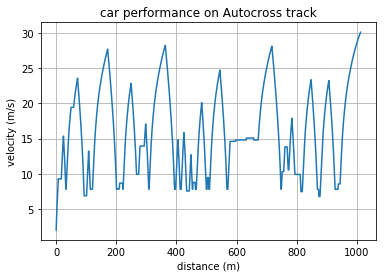

In [50]:
%matplotlib inline

plt.plot(distance, velocity)
plt.xlabel('distance (m)')
plt.ylabel('velocity (m/s)')
plt.grid()
plt.title('car performance on Autocross track')

In [51]:
result1 = {'distance traveled (m)': distance, 'velocity (m/s)': velocity,'lateral acceleration': lateral_acceleration}
result2 = {'time taken to finish the lap': [time]}
result3 = {'shifting to gear number': [i+2 for i in range(len(IdealShifts))], 'ideal shifting speed (m/s)': IdealShifts}

result1 = pd.DataFrame(result1)
result2 = pd.DataFrame(result2)
result3 = pd.DataFrame(result3)

results = pd.concat([result1,result2,result3], axis=1)

results.to_csv('Car results on the track')

print('results saved to "Car results on the track"')

results saved to "Car results on the track"
